In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch
import torch.nn as nn
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")
from pinns import *
from local_utils import *

from pinns import *
from intro import *

In [2]:
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

In [3]:
import pickle
with open(f"./inputs/solution_65.pkl", "rb") as f:
    (run_params, params, solution) = pickle.load(f)
    
    
run_params = Struct(**run_params)
params = Struct(**params)

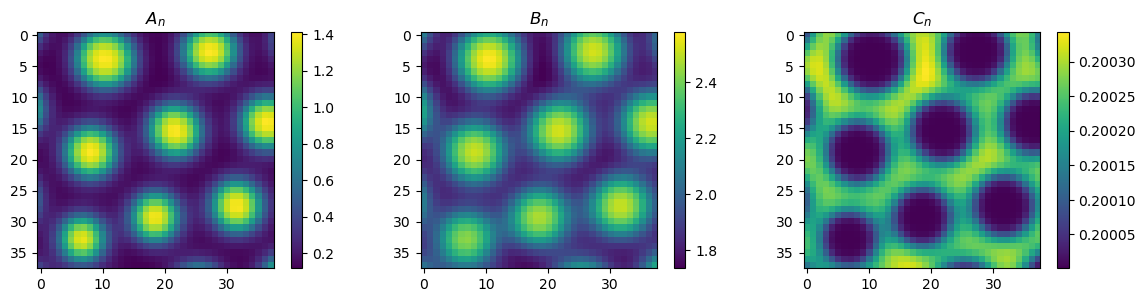

In [4]:
A_n = solution[-1, 0, :, :]
B_n = solution[-1, 1, :, :]
C_n = solution[-1, 2, :, :]

#############################################################
#    Inner boundaries
# By using these slices, we can remove the boundary effects
# or select a smaller portion of the domain
#
#   Important: slices must not be larger than slices(1,-1,1).
#              Otherwise, the boundary effects of finit difference
#              Laplacian cannot be removed
#
x_slice = slice(40,-50, 1)
y_slice = slice(40,-50, 1)

to = create_to(A_n[x_slice,y_slice])
########################################
# Take the average of data points
kernel =np.array([[1, 1],
                  [1, 1]])


A_n = ndimage.convolve(A_n, kernel)/4
B_n = ndimage.convolve(B_n, kernel)/4
C_n = ndimage.convolve(C_n, kernel)/4
############################################################
plot_n_im([A_n[x_slice,y_slice], 
           B_n[x_slice,y_slice], 
           C_n[x_slice,y_slice]], 
          [r"$A_{n}$", r"$B_{n}$", r"$C_{n}$"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

In [5]:
A_min, A_max = np.min(A_n), np.max(A_n)
B_min, B_max = np.min(B_n), np.max(B_n)
C_min, C_max = np.min(C_n), np.max(C_n)
n = params["n"]
tol = .005

def define_bound(tol, n, x_min, x_max):
    upper = ((1-tol)/tol)**(1/n)
    lower = (tol/(1-tol))**(1/n)
    # return (lower, upper) bounds and the initial guess
    return (max(0,x_min*lower), x_max*upper), max(0, (x_max*upper-max(0,x_min*lower))/2)
    
K_AA_bound, K_AA_init =  define_bound(tol, n, A_min, A_max)
K_AB_bound, K_AB_init =  define_bound(tol, n, A_min, A_max)
K_AC_bound, K_AC_init =  define_bound(tol, n, A_min, A_max)
K_BA_bound, K_BA_init =  define_bound(tol, n, B_min, B_max)
K_BC_bound, K_BC_init =  define_bound(tol, n, B_min, B_max)
K_CB_bound, K_CB_init =  define_bound(tol, n, C_min, C_max)
K_CC_bound, K_CC_init =  define_bound(tol, n, C_min, C_max)

Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (0, None)
    return Ks_bounds[name]


Epoch: 1 
 data loss:2.926858, 
data A loss:0.717395, data B loss:1.960149, data C loss:0.249315, 
Laplacian A loss:15.697948, Laplacian B loss:8.188840
Physics loss:1.886892
Negative loss:0.134002

 b_A=0.9000, b_B=0.9000, b_C=0.9000, V_A=0.9895, V_B=0.9915, V_C=1.0000, mu_A=0.9000, mu_B=1.0999, K_AA=2.6601, K_AB=2.6573, K_AC=2.6450, K_BA=4.6210, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


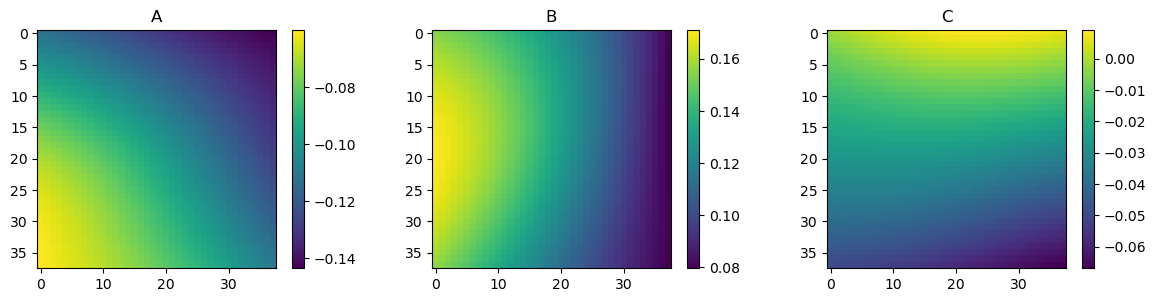

Epoch: 1000 
 data loss:0.379734, 
data A loss:0.169773, data B loss:0.209038, data C loss:0.000923, 
Laplacian A loss:5.055401, Laplacian B loss:8.179824
Physics loss:0.146222
Negative loss:0.077150

 b_A=-0.0481, b_B=0.1830, b_C=1.0006, V_A=0.7954, V_B=0.3120, V_C=1.0000, mu_A=0.2786, mu_B=-0.0197, K_AA=0.8634, K_AB=1.6391, K_AC=2.6450, K_BA=5.7904, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


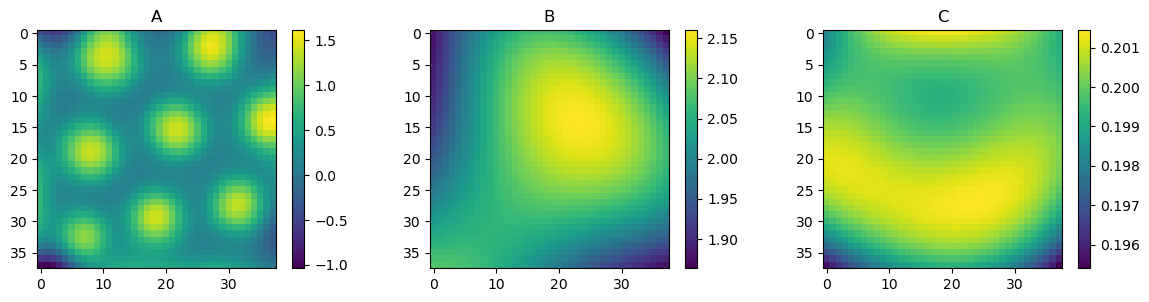

Epoch: 2000 
 data loss:0.228571, 
data A loss:0.078953, data B loss:0.149043, data C loss:0.000576, 
Laplacian A loss:2.369924, Laplacian B loss:4.340154
Physics loss:3.567177
Negative loss:0.013833

 b_A=-0.0197, b_B=-0.1019, b_C=1.0007, V_A=1.0792, V_B=15.5881, V_C=1.0000, mu_A=0.4232, mu_B=2.4256, K_AA=0.8288, K_AB=0.5768, K_AC=2.6450, K_BA=4.7124, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


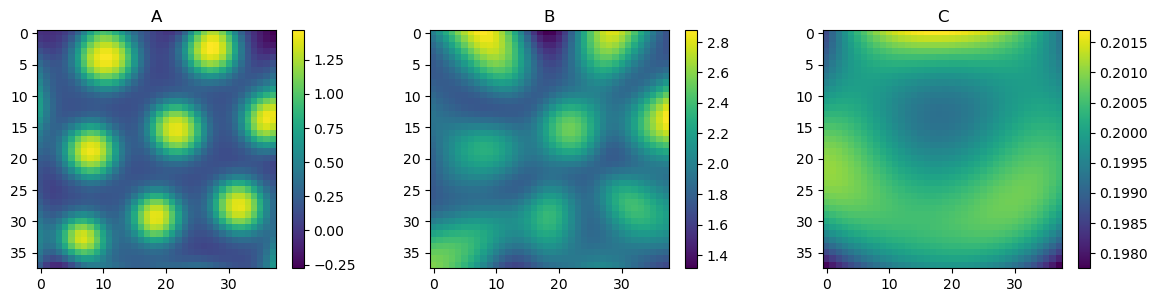

Epoch: 3000 
 data loss:0.116968, 
data A loss:0.051334, data B loss:0.065246, data C loss:0.000388, 
Laplacian A loss:1.374260, Laplacian B loss:1.540339
Physics loss:1.886223
Negative loss:0.000000

 b_A=-0.0147, b_B=-0.0238, b_C=1.0007, V_A=1.3168, V_B=23.0347, V_C=1.0000, mu_A=0.4345, mu_B=4.1218, K_AA=0.8460, K_AB=0.5276, K_AC=2.6450, K_BA=3.4480, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


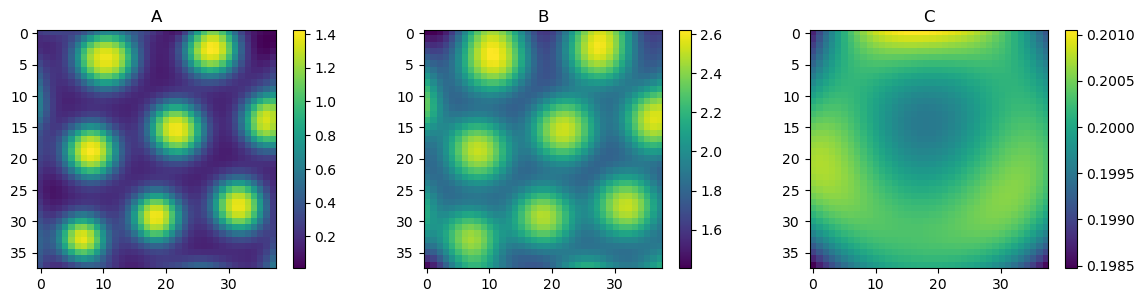

Epoch: 4000 
 data loss:0.096580, 
data A loss:0.044269, data B loss:0.052054, data C loss:0.000256, 
Laplacian A loss:1.061591, Laplacian B loss:1.075143
Physics loss:1.472117
Negative loss:0.000000

 b_A=-0.0182, b_B=-0.0162, b_C=1.0008, V_A=1.3409, V_B=23.6449, V_C=1.0000, mu_A=0.4428, mu_B=4.2440, K_AA=0.8498, K_AB=0.5249, K_AC=2.6450, K_BA=3.3718, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


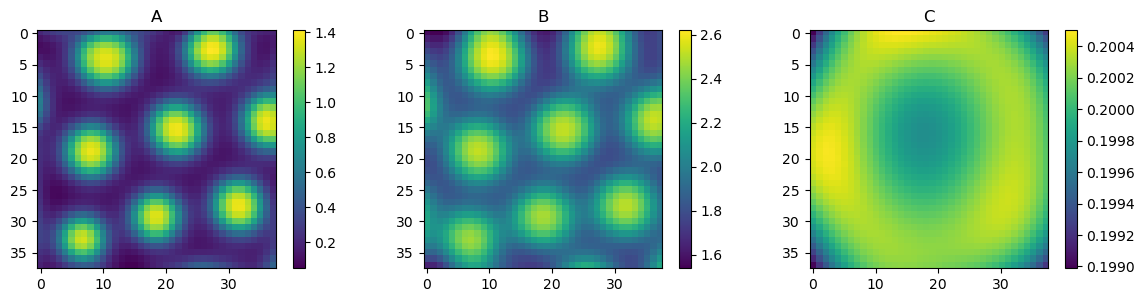

Epoch: 5000 
 data loss:0.081446, 
data A loss:0.035835, data B loss:0.045422, data C loss:0.000189, 
Laplacian A loss:0.854181, Laplacian B loss:0.750204
Physics loss:1.091434
Negative loss:0.000000

 b_A=-0.0204, b_B=-0.0060, b_C=1.0008, V_A=1.3671, V_B=23.9651, V_C=1.0000, mu_A=0.4438, mu_B=4.2858, K_AA=0.8440, K_AB=0.5198, K_AC=2.6450, K_BA=3.3332, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


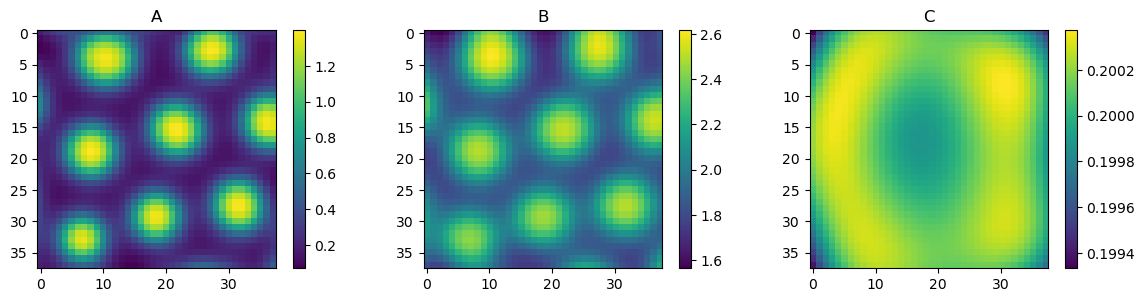

Epoch: 6000 
 data loss:0.066486, 
data A loss:0.034085, data B loss:0.031656, data C loss:0.000744, 
Laplacian A loss:0.723275, Laplacian B loss:0.566360
Physics loss:0.923125
Negative loss:0.000000

 b_A=-0.0269, b_B=-0.0044, b_C=1.0025, V_A=1.5021, V_B=24.0678, V_C=1.0000, mu_A=0.4441, mu_B=4.2932, K_AA=0.8536, K_AB=0.5198, K_AC=2.6450, K_BA=3.0696, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


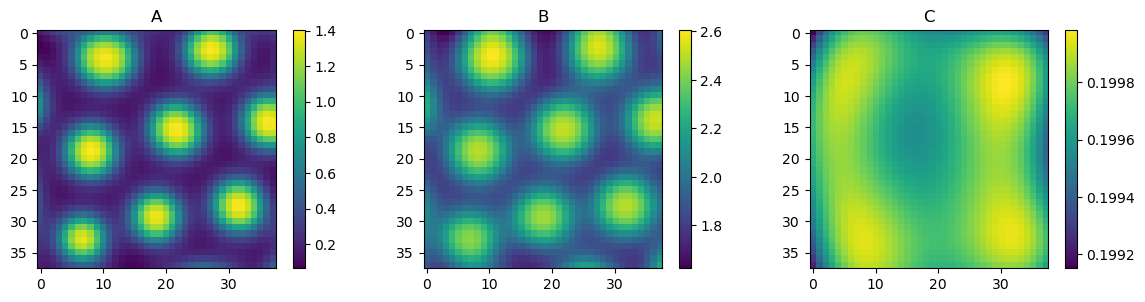

Epoch: 7000 
 data loss:0.059312, 
data A loss:0.037812, data B loss:0.021341, data C loss:0.000159, 
Laplacian A loss:0.622428, Laplacian B loss:0.436805
Physics loss:0.975488
Negative loss:0.000000

 b_A=-0.0426, b_B=-0.0052, b_C=1.0008, V_A=1.6368, V_B=24.0578, V_C=1.0000, mu_A=0.4458, mu_B=4.2704, K_AA=0.8702, K_AB=0.5282, K_AC=2.6450, K_BA=2.8698, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


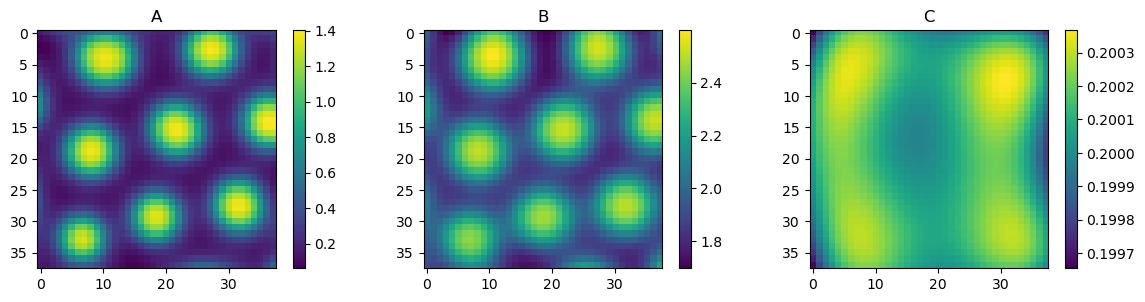

Epoch: 8000 
 data loss:0.043054, 
data A loss:0.029623, data B loss:0.013277, data C loss:0.000154, 
Laplacian A loss:0.547615, Laplacian B loss:0.350585
Physics loss:0.766985
Negative loss:0.000000

 b_A=-0.0326, b_B=-0.0048, b_C=1.0008, V_A=1.7498, V_B=23.9656, V_C=1.0000, mu_A=0.4434, mu_B=4.2998, K_AA=0.8696, K_AB=0.5177, K_AC=2.6450, K_BA=2.7637, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


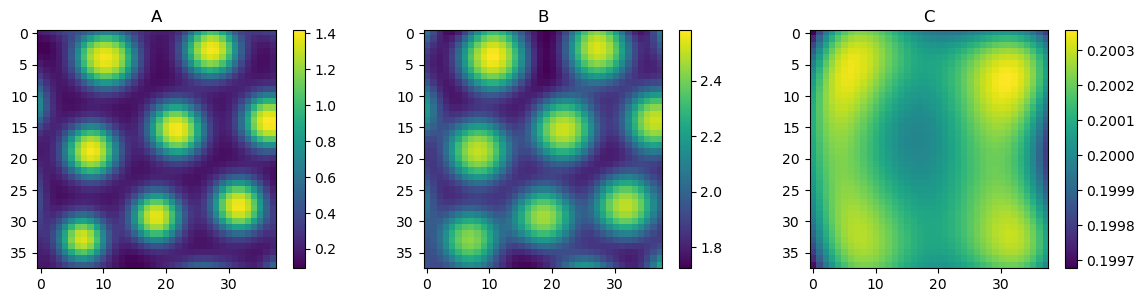

Epoch: 9000 
 data loss:0.055468, 
data A loss:0.040829, data B loss:0.014490, data C loss:0.000149, 
Laplacian A loss:0.498312, Laplacian B loss:0.294889
Physics loss:1.470628
Negative loss:0.000000

 b_A=-0.0528, b_B=0.0021, b_C=1.0008, V_A=1.8926, V_B=23.9875, V_C=1.0000, mu_A=0.4325, mu_B=4.2068, K_AA=0.8769, K_AB=0.5373, K_AC=2.6450, K_BA=2.6274, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


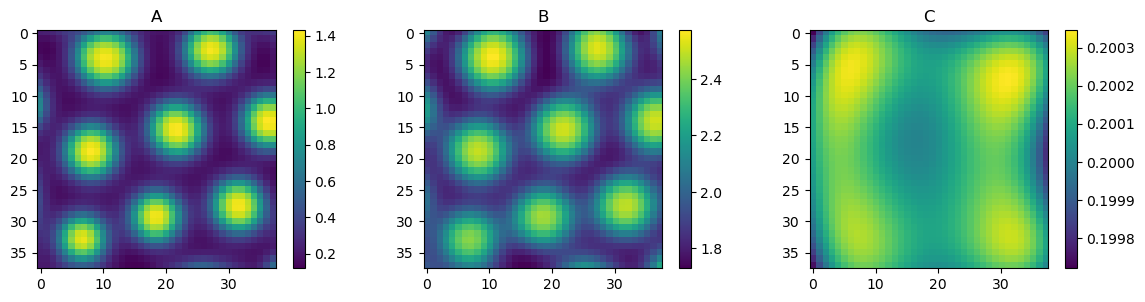

Epoch: 10000 
 data loss:0.033019, 
data A loss:0.023661, data B loss:0.009213, data C loss:0.000145, 
Laplacian A loss:0.451001, Laplacian B loss:0.254849
Physics loss:0.645061
Negative loss:0.000000

 b_A=-0.0350, b_B=-0.0040, b_C=1.0008, V_A=2.0309, V_B=23.9955, V_C=1.0000, mu_A=0.4458, mu_B=4.2991, K_AA=0.8855, K_AB=0.5164, K_AC=2.6450, K_BA=2.5471, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


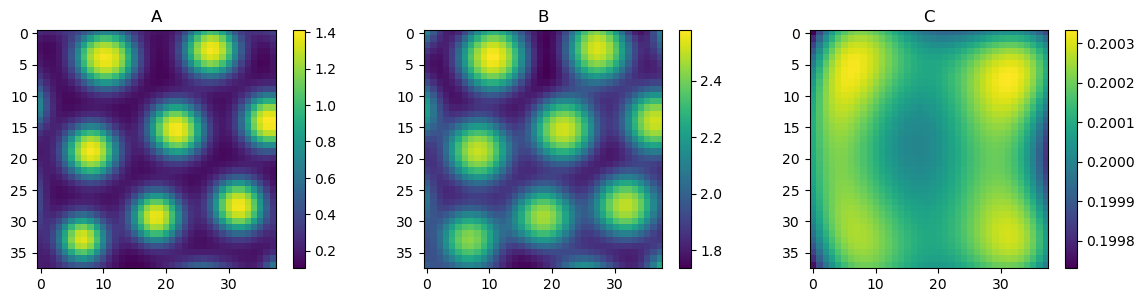

Epoch: 11000 
 data loss:0.043094, 
data A loss:0.029751, data B loss:0.011279, data C loss:0.002064, 
Laplacian A loss:0.418021, Laplacian B loss:0.232224
Physics loss:0.999121
Negative loss:0.000000

 b_A=-0.0433, b_B=0.0637, b_C=0.9869, V_A=2.1157, V_B=24.0231, V_C=1.0000, mu_A=0.4217, mu_B=4.1967, K_AA=0.9023, K_AB=0.5236, K_AC=2.6450, K_BA=2.4865, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


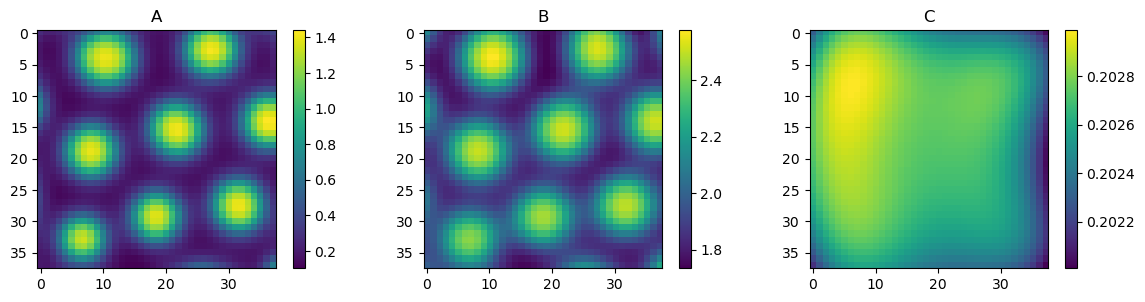

Epoch: 12000 
 data loss:0.027604, 
data A loss:0.019586, data B loss:0.007882, data C loss:0.000136, 
Laplacian A loss:0.384669, Laplacian B loss:0.209249
Physics loss:0.589199
Negative loss:0.000000

 b_A=-0.0336, b_B=-0.0020, b_C=1.0008, V_A=2.1922, V_B=23.9790, V_C=1.0000, mu_A=0.4451, mu_B=4.2979, K_AA=0.8920, K_AB=0.5157, K_AC=2.6450, K_BA=2.4585, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


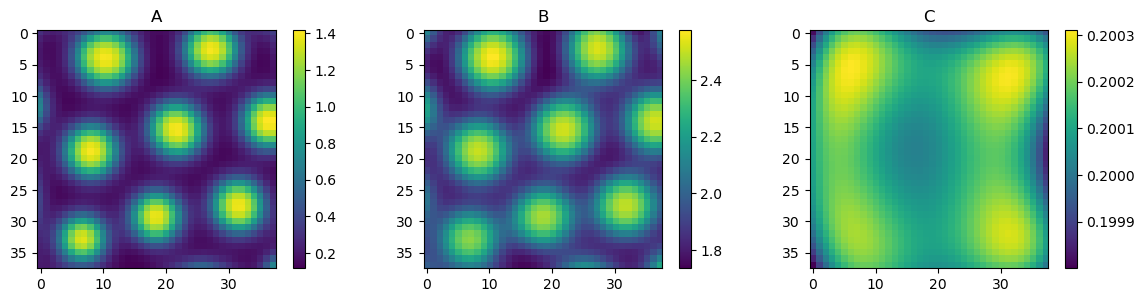

Epoch: 13000 
 data loss:0.026239, 
data A loss:0.018628, data B loss:0.007478, data C loss:0.000133, 
Laplacian A loss:0.358237, Laplacian B loss:0.191715
Physics loss:0.556433
Negative loss:0.000000

 b_A=-0.0330, b_B=-0.0042, b_C=1.0008, V_A=2.2893, V_B=23.9754, V_C=1.0000, mu_A=0.4467, mu_B=4.3048, K_AA=0.8966, K_AB=0.5172, K_AC=2.6450, K_BA=2.4084, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


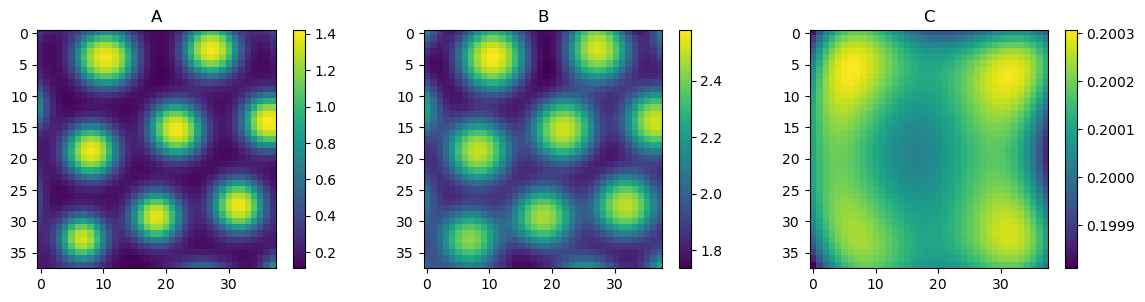

Epoch: 14000 
 data loss:0.024354, 
data A loss:0.017040, data B loss:0.007183, data C loss:0.000130, 
Laplacian A loss:0.334662, Laplacian B loss:0.176058
Physics loss:0.538197
Negative loss:0.000000

 b_A=-0.0346, b_B=-0.0025, b_C=1.0008, V_A=2.3457, V_B=23.9479, V_C=1.0000, mu_A=0.4444, mu_B=4.3017, K_AA=0.8985, K_AB=0.5148, K_AC=2.6450, K_BA=2.3806, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


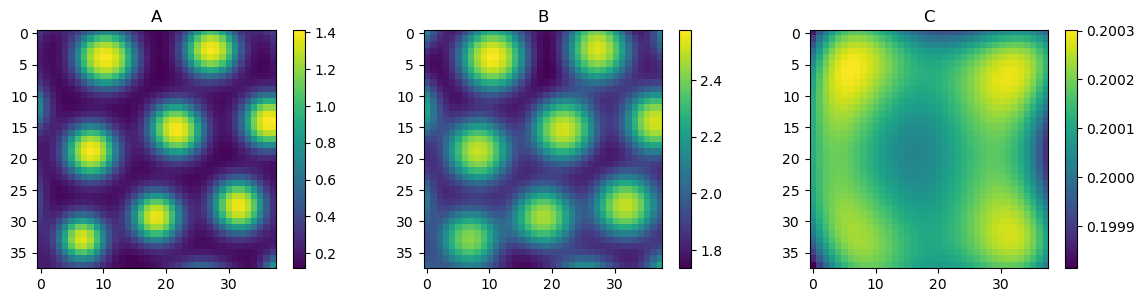

Epoch: 15000 
 data loss:0.032563, 
data A loss:0.024147, data B loss:0.008289, data C loss:0.000127, 
Laplacian A loss:0.316360, Laplacian B loss:0.163701
Physics loss:0.728550
Negative loss:0.000000

 b_A=-0.0419, b_B=-0.0071, b_C=1.0008, V_A=2.4126, V_B=23.9409, V_C=1.0000, mu_A=0.4486, mu_B=4.2962, K_AA=0.9068, K_AB=0.5212, K_AC=2.6450, K_BA=2.3486, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


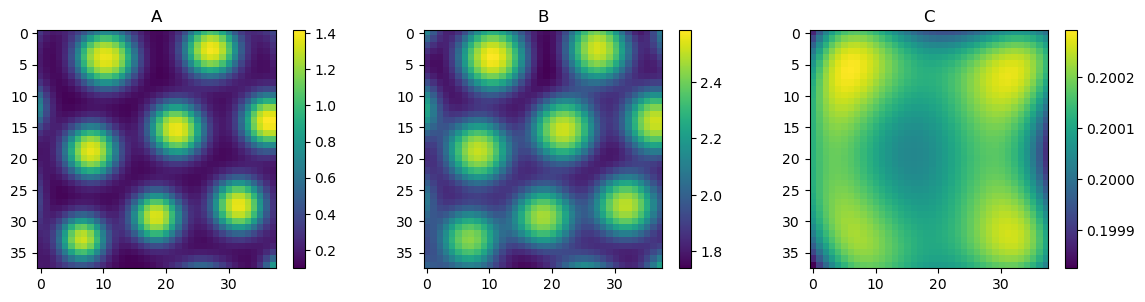

Epoch: 16000 
 data loss:0.050644, 
data A loss:0.041458, data B loss:0.009061, data C loss:0.000125, 
Laplacian A loss:0.314391, Laplacian B loss:0.151340
Physics loss:1.134812
Negative loss:0.000000

 b_A=-0.0408, b_B=-0.0015, b_C=1.0008, V_A=2.4628, V_B=23.9559, V_C=1.0000, mu_A=0.4476, mu_B=4.2957, K_AA=0.9085, K_AB=0.5248, K_AC=2.6450, K_BA=2.3268, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


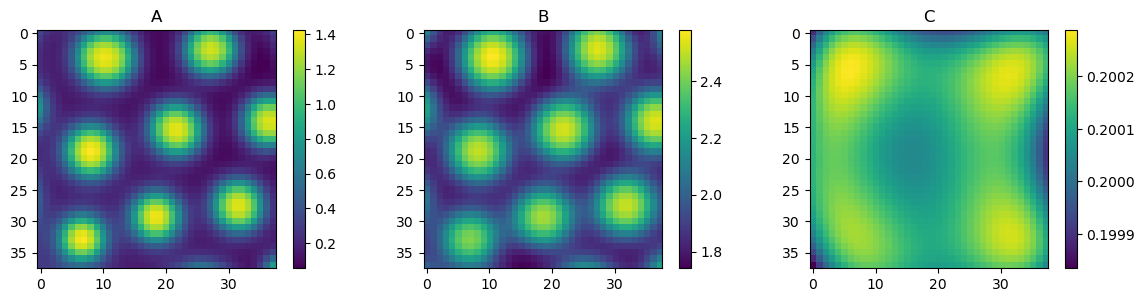

Epoch: 17000 
 data loss:0.030681, 
data A loss:0.022626, data B loss:0.007933, data C loss:0.000123, 
Laplacian A loss:0.283508, Laplacian B loss:0.140483
Physics loss:0.630477
Negative loss:0.000000

 b_A=-0.0321, b_B=0.0080, b_C=1.0008, V_A=2.4855, V_B=23.9128, V_C=1.0000, mu_A=0.4384, mu_B=4.2696, K_AA=0.9023, K_AB=0.5028, K_AC=2.6450, K_BA=2.3275, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


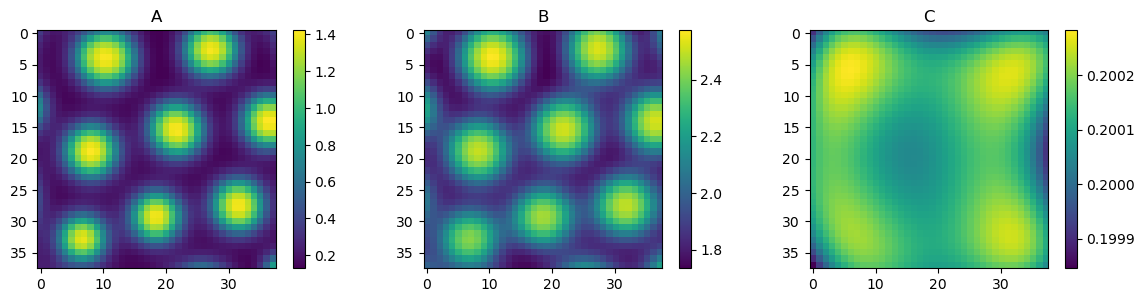

Epoch: 18000 
 data loss:0.025197, 
data A loss:0.018252, data B loss:0.006825, data C loss:0.000121, 
Laplacian A loss:0.268891, Laplacian B loss:0.129948
Physics loss:0.673124
Negative loss:0.000000

 b_A=-0.0284, b_B=0.0041, b_C=1.0008, V_A=2.5571, V_B=23.9045, V_C=1.0000, mu_A=0.4427, mu_B=4.3004, K_AA=0.9056, K_AB=0.5140, K_AC=2.6450, K_BA=2.2999, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


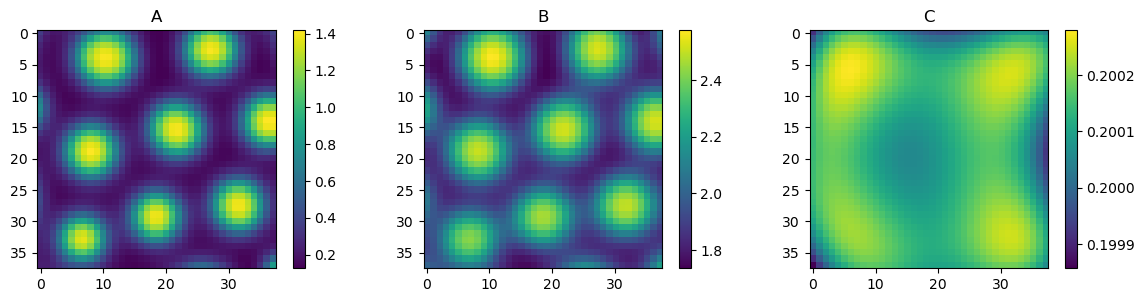

Epoch: 19000 
 data loss:0.019841, 
data A loss:0.013872, data B loss:0.005850, data C loss:0.000119, 
Laplacian A loss:0.255717, Laplacian B loss:0.120709
Physics loss:0.470148
Negative loss:0.000000

 b_A=-0.0318, b_B=-0.0028, b_C=1.0008, V_A=2.6343, V_B=23.9612, V_C=1.0000, mu_A=0.4465, mu_B=4.3053, K_AA=0.9087, K_AB=0.5156, K_AC=2.6450, K_BA=2.2707, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


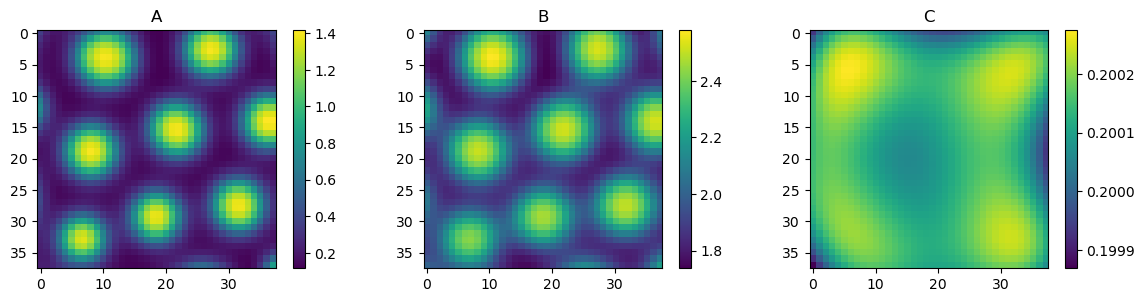

Epoch: 20000 
 data loss:0.020220, 
data A loss:0.014339, data B loss:0.005764, data C loss:0.000117, 
Laplacian A loss:0.245182, Laplacian B loss:0.113984
Physics loss:0.469689
Negative loss:0.000000

 b_A=-0.0357, b_B=-0.0046, b_C=1.0008, V_A=2.6800, V_B=23.9635, V_C=1.0000, mu_A=0.4477, mu_B=4.2975, K_AA=0.9113, K_AB=0.5175, K_AC=2.6450, K_BA=2.2553, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


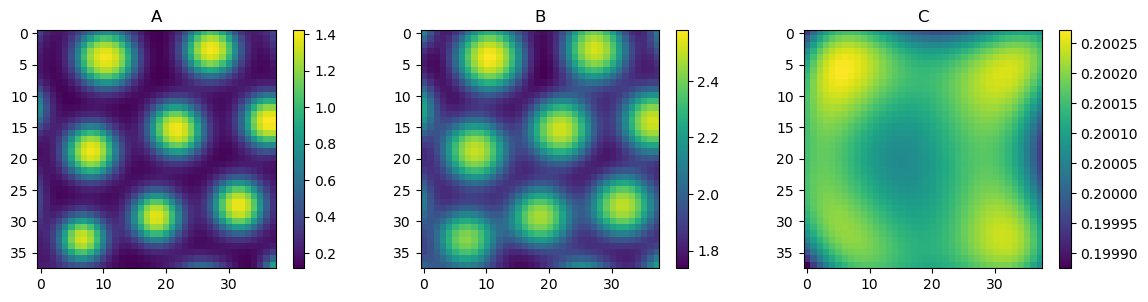

Epoch: 21000 
 data loss:0.027196, 
data A loss:0.020120, data B loss:0.006960, data C loss:0.000116, 
Laplacian A loss:0.237522, Laplacian B loss:0.110325
Physics loss:0.584004
Negative loss:0.000000

 b_A=-0.0428, b_B=-0.0110, b_C=1.0008, V_A=2.7033, V_B=23.8889, V_C=1.0000, mu_A=0.4531, mu_B=4.3004, K_AA=0.9137, K_AB=0.5190, K_AC=2.6450, K_BA=2.2507, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


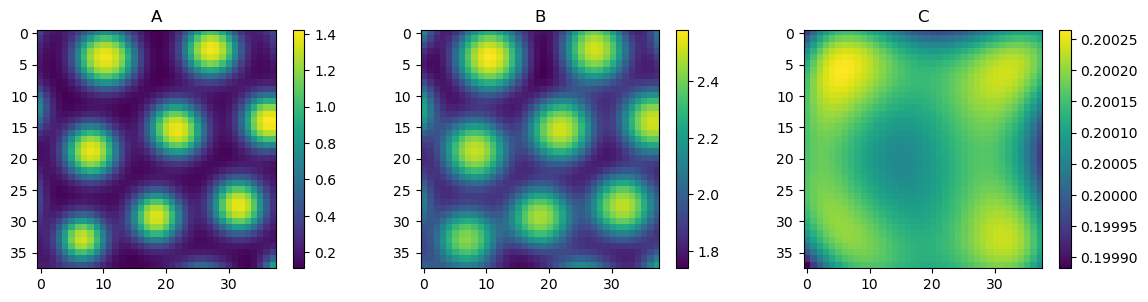

Epoch: 22000 
 data loss:0.033038, 
data A loss:0.022243, data B loss:0.010671, data C loss:0.000124, 
Laplacian A loss:0.230228, Laplacian B loss:0.111595
Physics loss:0.732170
Negative loss:0.000000

 b_A=-0.0360, b_B=0.0013, b_C=1.0008, V_A=2.7543, V_B=23.9507, V_C=1.0000, mu_A=0.4393, mu_B=4.2641, K_AA=0.9101, K_AB=0.5174, K_AC=2.6450, K_BA=2.2314, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


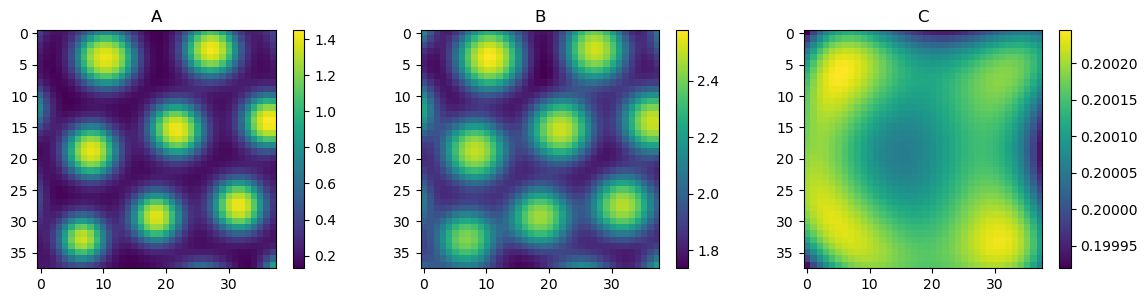

Epoch: 23000 
 data loss:0.017911, 
data A loss:0.012703, data B loss:0.005095, data C loss:0.000113, 
Laplacian A loss:0.217876, Laplacian B loss:0.097563
Physics loss:0.441932
Negative loss:0.000000

 b_A=-0.0330, b_B=-0.0034, b_C=1.0008, V_A=2.7948, V_B=23.9648, V_C=1.0000, mu_A=0.4479, mu_B=4.3006, K_AA=0.9138, K_AB=0.5163, K_AC=2.6450, K_BA=2.2198, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


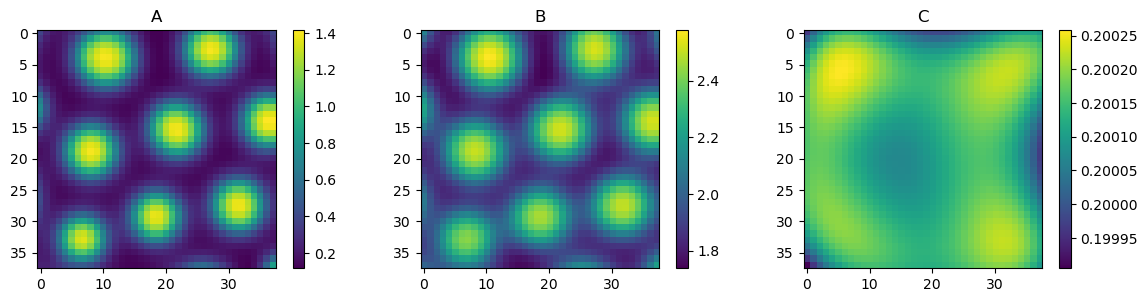

Epoch: 24000 
 data loss:0.017824, 
data A loss:0.012667, data B loss:0.005045, data C loss:0.000112, 
Laplacian A loss:0.210311, Laplacian B loss:0.093528
Physics loss:0.456462
Negative loss:0.000000

 b_A=-0.0298, b_B=-0.0019, b_C=1.0008, V_A=2.8357, V_B=23.9668, V_C=1.0000, mu_A=0.4469, mu_B=4.3022, K_AA=0.9135, K_AB=0.5152, K_AC=2.6450, K_BA=2.2087, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


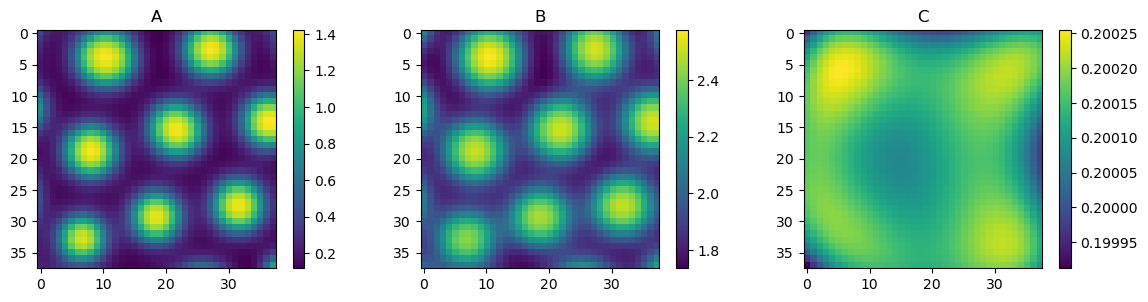

Epoch: 25000 
 data loss:0.035752, 
data A loss:0.028829, data B loss:0.006751, data C loss:0.000172, 
Laplacian A loss:0.216171, Laplacian B loss:0.092607
Physics loss:0.800240
Negative loss:0.000000

 b_A=-0.0324, b_B=-0.0021, b_C=0.9997, V_A=2.8787, V_B=23.9599, V_C=1.0000, mu_A=0.4456, mu_B=4.2940, K_AA=0.9167, K_AB=0.5199, K_AC=2.6450, K_BA=2.1936, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


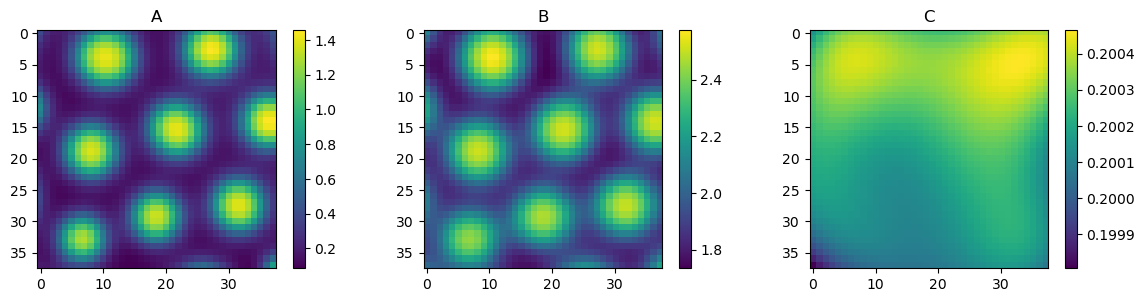

Epoch: 26000 
 data loss:0.016833, 
data A loss:0.011865, data B loss:0.004707, data C loss:0.000261, 
Laplacian A loss:0.196456, Laplacian B loss:0.086023
Physics loss:0.424822
Negative loss:0.000000

 b_A=-0.0315, b_B=-0.0026, b_C=0.9990, V_A=2.8894, V_B=23.9611, V_C=1.0000, mu_A=0.4472, mu_B=4.3021, K_AA=0.9160, K_AB=0.5161, K_AC=2.6450, K_BA=2.1912, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


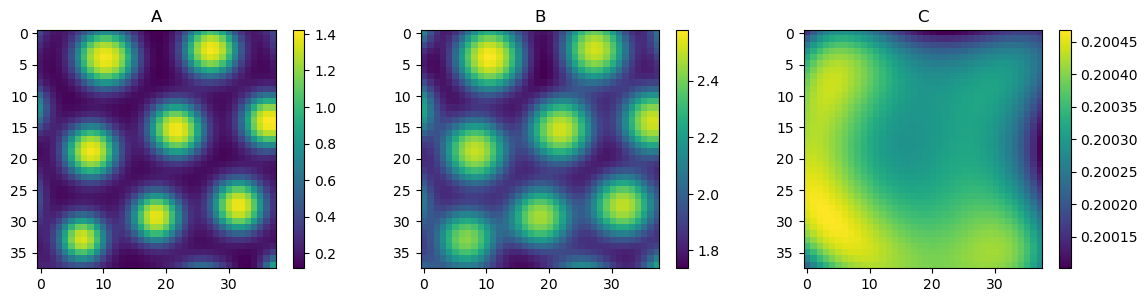

Epoch: 27000 
 data loss:0.033572, 
data A loss:0.025869, data B loss:0.007594, data C loss:0.000109, 
Laplacian A loss:0.197377, Laplacian B loss:0.089652
Physics loss:0.887956
Negative loss:0.000000

 b_A=-0.0286, b_B=0.0090, b_C=1.0008, V_A=2.9337, V_B=23.9734, V_C=1.0000, mu_A=0.4385, mu_B=4.2773, K_AA=0.9161, K_AB=0.5164, K_AC=2.6450, K_BA=2.1806, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


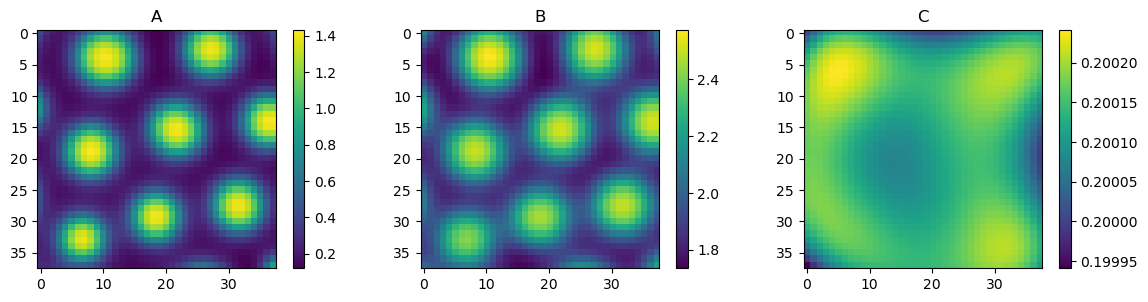

Epoch: 28000 
 data loss:0.021272, 
data A loss:0.015806, data B loss:0.004990, data C loss:0.000477, 
Laplacian A loss:0.186987, Laplacian B loss:0.080691
Physics loss:0.546406
Negative loss:0.000000

 b_A=-0.0277, b_B=0.0021, b_C=0.9983, V_A=2.9631, V_B=23.9655, V_C=1.0000, mu_A=0.4440, mu_B=4.3016, K_AA=0.9157, K_AB=0.5141, K_AC=2.6450, K_BA=2.1727, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


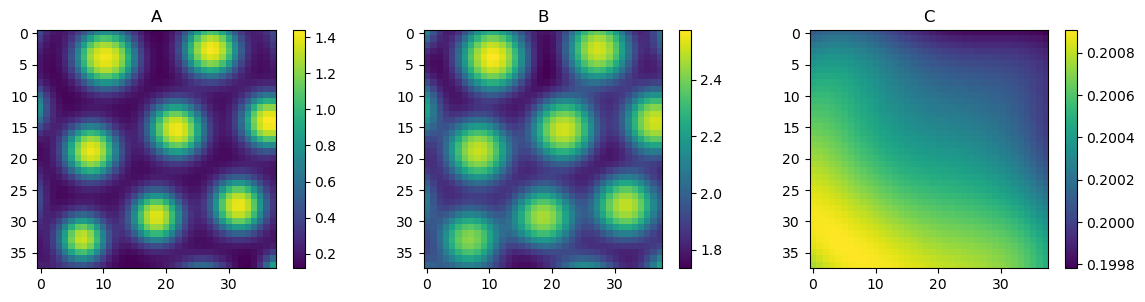

Epoch: 29000 
 data loss:0.029229, 
data A loss:0.022012, data B loss:0.007110, data C loss:0.000107, 
Laplacian A loss:0.187093, Laplacian B loss:0.082359
Physics loss:0.658915
Negative loss:0.000000

 b_A=-0.0482, b_B=-0.0109, b_C=1.0008, V_A=2.9697, V_B=23.8897, V_C=1.0000, mu_A=0.4541, mu_B=4.2854, K_AA=0.9132, K_AB=0.5219, K_AC=2.6450, K_BA=2.1723, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


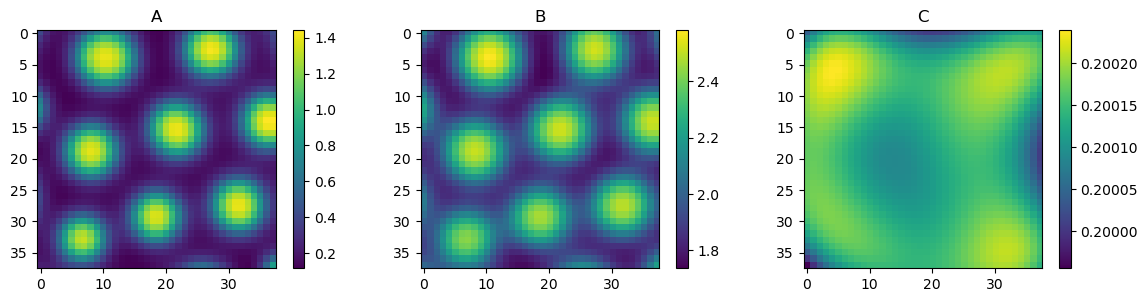

Epoch: 30000 
 data loss:0.016756, 
data A loss:0.012098, data B loss:0.004551, data C loss:0.000107, 
Laplacian A loss:0.174713, Laplacian B loss:0.075587
Physics loss:0.425156
Negative loss:0.000000

 b_A=-0.0378, b_B=-0.0070, b_C=1.0008, V_A=2.9872, V_B=23.9356, V_C=1.0000, mu_A=0.4490, mu_B=4.2947, K_AA=0.9185, K_AB=0.5164, K_AC=2.6450, K_BA=2.1645, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


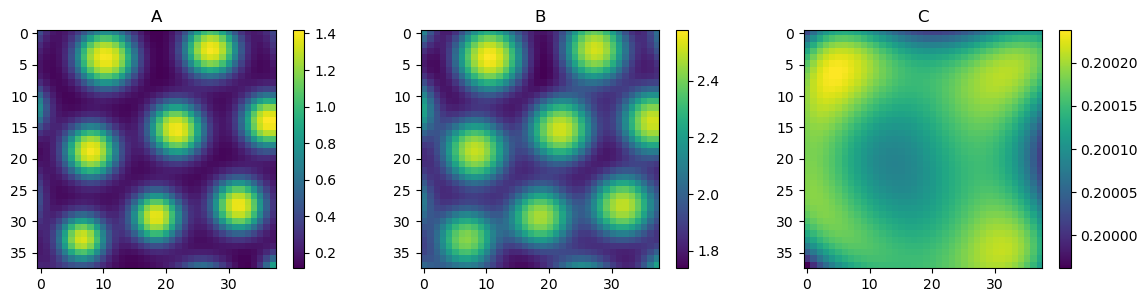

    Early dtoped at 30032
Epoch: 30032 
 data loss:0.015793, 
data A loss:0.011308, data B loss:0.004378, data C loss:0.000107, 
Laplacian A loss:0.174212, Laplacian B loss:0.075119
Physics loss:0.410037
Negative loss:0.000000

 b_A=-0.0324, b_B=-0.0038, b_C=1.0008, V_A=3.0027, V_B=23.9661, V_C=1.0000, mu_A=0.4481, mu_B=4.3017, K_AA=0.9192, K_AB=0.5165, K_AC=2.6450, K_BA=2.1598, K_BC=4.6210, K_CB=0.3497, K_CC=0.3497


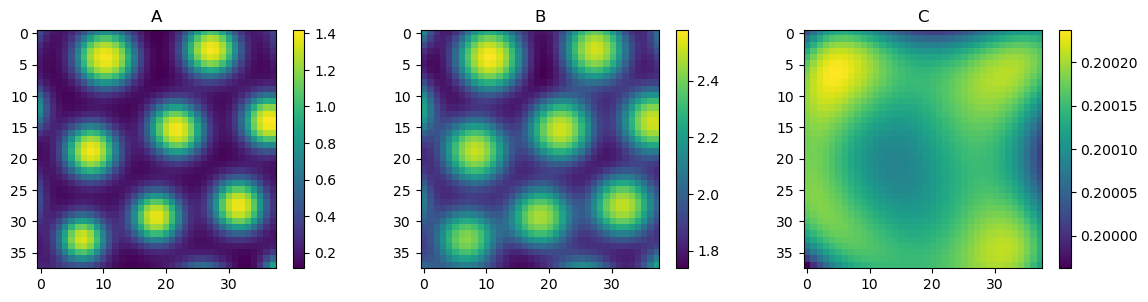

In [6]:
torch.manual_seed(42)
np.random.seed(42)
dtype = torch.float32
torch.set_default_dtype(dtype)

def create_var(init=None):
    if init is None:
        return torch.nn.Parameter(torch.ones(1, requires_grad=True, device=dev_str)), []
    else:
        return torch.nn.Parameter(init*torch.ones(1, requires_grad=True, device=dev_str)), []


D_A=params["D_A"]#, sampled_D_A = create_var()
D_B=params["D_B"]#, sampled_D_B = create_var()
b_A, sampled_b_A = create_var(1)
b_B, sampled_b_B = create_var(1)
b_C, sampled_b_C = create_var(1)
V_A, sampled_V_A = create_var(1)
V_B, sampled_V_B = create_var(1)
V_C, sampled_V_C = create_var(1)
mu_A, sampled_mu_A = create_var(1)
mu_B, sampled_mu_B = create_var(1)
mu_C=params["mu_C"]#, sampled_mu_C = create_var()
K_AA, sampled_K_AA = create_var(K_AA_init)
K_AB, sampled_K_AB = create_var(K_AB_init)
K_AC, sampled_K_AC = create_var(K_AC_init)
K_BA, sampled_K_BA = create_var(K_BA_init)
K_BC, sampled_K_BC = create_var(K_BC_init)
K_CB, sampled_K_CB = create_var(K_CB_init)
K_CC, sampled_K_CC = create_var(K_CC_init)
n = params['n']

params_name_list = [#"D_A", "D_B", 
                    "b_A", "b_B", "b_C", "V_A", "V_B", "V_C", "mu_A", "mu_B", #"mu_C",
                    "K_AA", "K_AB", "K_AC", "K_BA", "K_BC", "K_CB", 
                    "K_CC"
]

params_list = [#D_A, D_B, 
               b_A, b_B, b_C, V_A, V_B, V_C, mu_A, mu_B, #mu_C,
               K_AA, K_AB, K_AC, K_BA, K_BC, K_CB, 
               K_CC
]

params_sampled_list =[#sampled_D_A, sampled_D_B,
                      sampled_b_A, sampled_b_B, sampled_b_C, sampled_V_A, sampled_V_B, sampled_V_C,
                      sampled_mu_A, sampled_mu_B, #sampled_mu_C,
                      sampled_K_AA, sampled_K_AB, sampled_K_AC, sampled_K_BA, sampled_K_BC,
                      sampled_K_CB, sampled_K_CC
                     ]

###########################################################
# Inputs
# restrict to inner boundaries
x = torch.linspace(0, run_params.Lx, run_params.Ix)[x_slice].to(device)
y = torch.linspace(0, run_params.Ly, run_params.Jy)[y_slice].to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
data_X = torch.vstack([X.flatten(), Y.flatten()]).T.requires_grad_(True).to(device)

def transform(x, l, u):
    return (u-l)*x + l

x2 = transform(torch.rand(run_params.Ix),torch.min(x).item(),torch.max(x).item())
y2 = transform(torch.rand(run_params.Jy),torch.min(y).item(),torch.max(y).item())
X2,Y2 = torch.meshgrid(x2, y2, indexing='ij')
physics_X = torch.vstack([X2.flatten(), Y2.flatten()]).T.requires_grad_(True).to(device)
##########################################################
#   Data
# restrict to inner boundaries
data_A = torch.from_numpy(A_n[x_slice,y_slice].flatten()).to(device)
data_B = torch.from_numpy(B_n[x_slice,y_slice].flatten()).to(device)
data_C = torch.from_numpy(C_n[x_slice,y_slice].flatten()).to(device)
###########################################################
# Laplacians
# First, find the finite-diff Laplacian on the whole domain,
# then, select the inner boundaries. This way, the boundaries 
# effets removed
diffusion_scale_factor = (run_params.Ix-1)*(run_params.Jy-1)/(run_params.Lx*run_params.Ly)
laplacianA = diffusion_scale_factor * grad_diff(A_n)
laplacianB = diffusion_scale_factor * grad_diff(B_n)

laplacianA = torch.tensor(laplacianA[x_slice,y_slice].flatten()).to(device)
laplacianB = torch.tensor(laplacianB[x_slice,y_slice].flatten()).to(device)
###########################################################
zeors_tensor = torch.zeros(data_X.shape[0]).to(device)
###########################################################
# Model
lb = torch.tensor([torch.min(x).item(), torch.min(y).item()]).to(device)
ub = torch.tensor([torch.max(x).item(), torch.max(y).item()]).to(device)
model = Net_sep_dense_normalised(2,3,[128,128,128,128], lb, ub).to(device)
###########################################################
# optimizer
optimizer = torch.optim.Adam([{'params': model.parameters(), 'lr': 1e-4},
                              {'params': params_list, 'lr': .1}]
                              , lr=1e-4)#.LBFGS([*model.parameters(), *params_list], lr=1
                             #,line_search_fn='strong_wolfe')#


epochs = 30000
loss_data = 0.0
lambda_data = 1.0
loss_physics = 0.0
lambda_physics = 1e-4
loss_laplacian_physics = 0.0
lambda_physics_laplacian = 1e-2
loss_negative = 0
lambda_negative = 100

losses = np.zeros((7, epochs+6000))
last_loss = np.inf

def act(x, km, n=2):
    return x**n / (x**n + km**n)

def inh(x, km, n=2):
    return km**n / (x**n + km**n)

for i in range(epochs +6000): 
    # L-BFGS
    def closure():
        
        optimizer.zero_grad()

        #################################
        # data loss
        data_f_hat = model(data_X)
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        loss_A_data = torch.mean((data_A - data_A_hat)**2)
        loss_B_data = torch.mean((data_B - data_B_hat)**2)
        loss_C_data = torch.mean((data_C - data_C_hat)**2)
        loss_data = (loss_A_data + loss_B_data + loss_C_data)/3
        #################################
        loss_negative = torch.mean(torch.maximum(-data_A_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_B_hat, zeors_tensor)**2
                       )+ torch.mean(torch.maximum(-data_C_hat, zeors_tensor)**2
                       )
        #################################
        # Laplacians derivatives        
        laplacianA_hat = Laplacian(data_A_hat, data_X)
        laplacianB_hat = Laplacian(data_B_hat, data_X)
        
        A_loss_laplacian = torch.mean((laplacianA_hat-laplacianA)**2)
        B_loss_laplacian = torch.mean((laplacianB_hat-laplacianB)**2)
        loss_laplacian_physics = A_loss_laplacian + B_loss_laplacian
        ###############################
        # physics derivatives  
        physics_f_hat = model(physics_X)
        A = physics_f_hat[0].squeeze() 
        B = physics_f_hat[1].squeeze() 
        C = physics_f_hat[2].squeeze() 
        
        laplacianA_hat = Laplacian(A, physics_X)
        laplacianB_hat = Laplacian(B, physics_X)
        
        F_A =  b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - mu_A * A    
        F_B =  b_B + V_B*act(A, K_AB, n) - mu_B * B        
        F_C =  b_C - mu_C * C        

        dAdt = D_A * laplacianA_hat + F_A
        dBdt = D_B * laplacianB_hat + F_B
        dCdt = F_C
        ################################
        # physics loss
        # Construct the physics loss here
        A_loss_physics = torch.mean(dAdt**2)
        B_loss_physics = torch.mean(dBdt**2)
        C_loss_physics = torch.mean(dCdt**2)
        loss_physics = (A_loss_physics  
                        + B_loss_physics 
                        + C_loss_physics)
        ###############################
        total_loss = (
            +lambda_data*loss_data            
            +lambda_physics_laplacian*loss_laplacian_physics
            +lambda_physics*loss_physics
            #+lambda_negative*loss_negative
                        )

        total_loss.backward(retain_graph=True)
        
        
        losses[:,i] = (loss_A_data.item(), loss_B_data.item(), loss_C_data.item(), 
                       A_loss_laplacian.item(), B_loss_laplacian.item(),
                       loss_physics.item(), loss_negative.item())                    
            
        return total_loss
    
    
    
    optimizer.step(closure)
    
    def show_outputs(i):
        ls = np.sqrt(losses[:, i])
        print("============================================")
        print(f"Epoch: {i+1} \n data loss:{np.sum(ls[0:3]):.6f}, \n"
              f"data A loss:{ls[0]:.6f}, data B loss:{ls[1]:.6f}, data C loss:{ls[2]:.6f}, \n"
              f"Laplacian A loss:{ls[3]:.6f}, Laplacian B loss:{ls[4]:.6f}\n"
              f"Physics loss:{ls[5]:.6f}\n"
              f"Negative loss:{ls[6]:.6f}\n"
              f"\n"
              ,
              ", ".join([f"{name}={param.item():.4f}" for param, name in zip(params_list, params_name_list)])
             )
        data_f_hat = model(data_X)        
        data_A_hat = data_f_hat[0].squeeze() 
        data_B_hat = data_f_hat[1].squeeze() 
        data_C_hat = data_f_hat[2].squeeze() 
        plot_n_im([to(data_A_hat.cpu().detach().numpy()), 
                   to(data_B_hat.cpu().detach().numpy()), 
                   to(data_C_hat.cpu().detach().numpy())], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()
       
    
    if i < epochs and last_loss > np.sum(losses[:,i]):
        last_loss =  np.sum(losses[:,i])
            
    elif np.sum(losses[:,i]) < last_loss:
        print("============================================")
        print(f"    Early dtoped at {i+1}")
        print("============================================")
        show_outputs(i)
        early_stop = True
        with torch.no_grad():
            for i,(param, name) in enumerate(zip(params_list, params_name_list)):
                l,u = get_bound(name)
                param[:] = param.clamp(l,u)
                params_sampled_list[i].append(param.item())
        break        
    
    if (i+1)%1000 == 0 or i==0:        
        show_outputs(i)
        
    with torch.no_grad():
        for i,(param, name) in enumerate(zip(params_list, params_name_list)):
            l,u = get_bound(name)
            param[:] = param.clamp(l,u)
            params_sampled_list[i].append(param.item())
            


# Plot the trained outputs

A RMSE:0.011169907006703604 B RMSE:0.004363621488013391 C RMSE:0.00010702906160115966
F_A actual:0.027873545637639552, F_A:0.027396490797400475, RMSE: 0.00636983989810051
F_B actual:72.2335422444037, F_B:71.88272857666016, RMSE: 0.3174298822803359
F_C actual:6.159175407762405e-10, F_C:2.92603857587892e-07, RMSE: 0.0005308638185839993

Laplacian A RMSE: 0.17414019817427
Laplacian B RMSE: 0.07508511751018639

dAdt RMSE: 0.0065582020985919245
dBdt RMSE: 0.3224176102094788
dCdt RMSE: 0.0005308638185839993


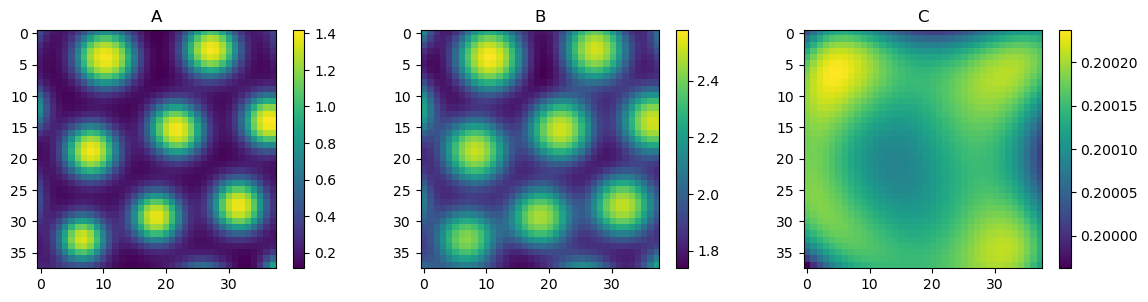

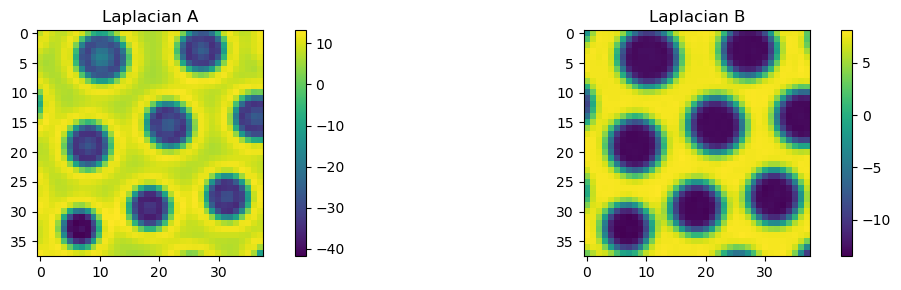

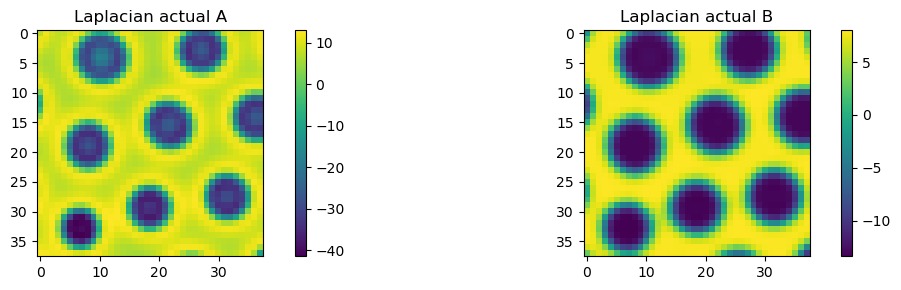

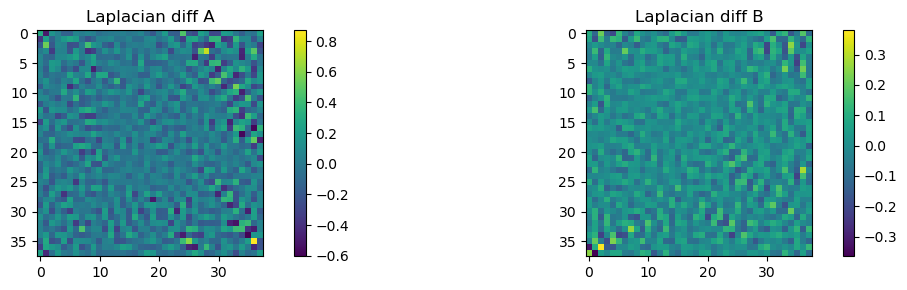

In [7]:
physics_f = model(data_X)
A_hat = physics_f[0].squeeze()
B_hat = physics_f[1].squeeze()
C_hat = physics_f[2].squeeze()

laplacianA_hat = Laplacian(A_hat, data_X)
laplacianB_hat = Laplacian(B_hat, data_X)

A_hat = to(A_hat.cpu().detach().numpy())
B_hat = to(B_hat.cpu().detach().numpy())
C_hat = to(C_hat.cpu().detach().numpy())
laplacianA_hat = to(laplacianA_hat.cpu().detach().numpy())
laplacianB_hat = to(laplacianB_hat.cpu().detach().numpy())


laplacianA = diffusion_scale_factor * grad_diff(A_n)[x_slice,y_slice]
laplacianB = diffusion_scale_factor * grad_diff(B_n)[x_slice,y_slice]

n = params["n"]

A = A_n[x_slice,y_slice]
B = B_n[x_slice,y_slice]
C = C_n[x_slice,y_slice]

F_A =  params["b_A"] + params["V_A"]*act(A, params["K_AA"], n)*inh(B, params["K_BA"], n) - params["mu_A"] * A
F_A_hat =  params["b_A"] + params["V_A"]*act(A_hat, params["K_AA"], n)*inh(B_hat, params["K_BA"], n) - params["mu_A"] * A_hat
F_B =  params["b_B"] + params["V_B"]*act(A, params["K_AB"], n)*inh(C, params["K_CB"], n) - params["mu_B"] * B
F_B_hat =  params["b_B"] + params["V_B"]*act(A_hat, params["K_AB"], n)*inh(C_hat, params["K_CB"], n) - params["mu_B"] * B_hat
F_C =  params["b_C"] + params["V_C"]*inh(A, params["K_AC"], n)*inh(B, params["K_BC"], n)*act(C, params["K_CC"], n) - params["mu_C"] * C
F_C_hat =  params["b_C"] + params["V_C"]*inh(A_hat, params["K_AC"], n)*inh(B_hat, params["K_BC"], n)*act(C_hat, params["K_CC"], n) - params["mu_C"] * C_hat


dAdt = params["D_A"]*laplacianA + F_A
dAdt_hat = params["D_A"]*laplacianA_hat + F_A_hat
dBdt = params["D_B"]*laplacianB + F_B
dBdt_hat = params["D_B"]*laplacianB_hat + F_B_hat

print(f"A RMSE:{np.sqrt(np.mean((A_hat-A)**2))}",
      f"B RMSE:{np.sqrt(np.mean((B_hat-B)**2))}",
      f"C RMSE:{np.sqrt(np.mean((C_hat-C)**2))}")

print(f"F_A actual:{np.mean(F_A**2)}, F_A:{np.mean(F_A_hat**2)}, RMSE: {np.sqrt(np.mean((F_A - F_A_hat)**2))}")
print(f"F_B actual:{np.mean(F_B**2)}, F_B:{np.mean(F_B_hat**2)}, RMSE: {np.sqrt(np.mean((F_B - F_B_hat)**2))}")
print(f"F_C actual:{np.mean(F_C**2)}, F_C:{np.mean(F_C_hat**2)}, RMSE: {np.sqrt(np.mean((F_C - F_C_hat)**2))}")
      

print()
print(f"Laplacian A RMSE: {np.sqrt(np.mean((laplacianA_hat-laplacianA)**2))}")
print(f"Laplacian B RMSE: {np.sqrt(np.mean((laplacianB_hat-laplacianB)**2))}")

print()
print(f"dAdt RMSE: {np.sqrt(np.mean((dAdt-dAdt_hat)**2))}")
print(f"dBdt RMSE: {np.sqrt(np.mean((dBdt-dBdt_hat)**2))}")
print(f"dCdt RMSE: {np.sqrt(np.mean((F_C-F_C_hat)**2))}")

plot_n_im([A_hat, B_hat, C_hat], 
          ["A", "B", "C"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()


plot_n_im([laplacianA_hat, laplacianB_hat], 
          ["Laplacian A", "Laplacian B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA, laplacianB], 
          ["Laplacian actual A", "Laplacian actual B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

plot_n_im([laplacianA_hat-laplacianA, laplacianB_hat-laplacianB], 
          ["Laplacian diff A", "Laplacian diff B"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()



# Plot losses

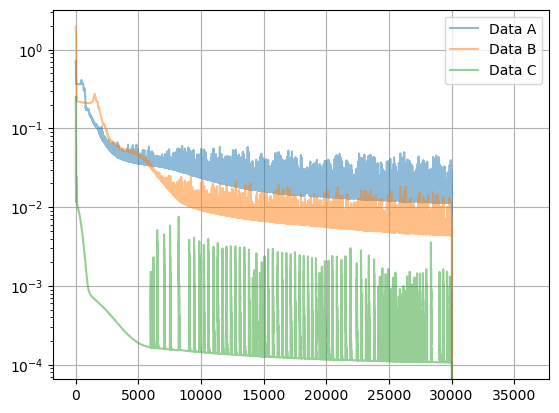

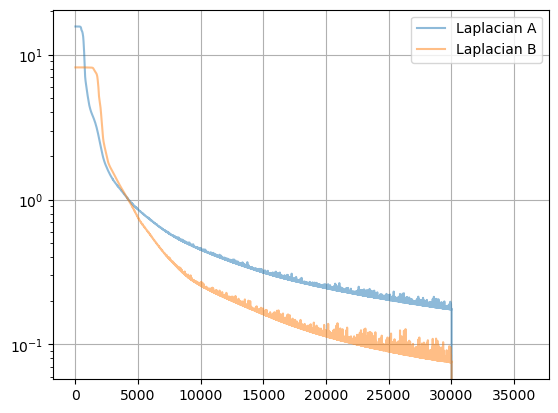

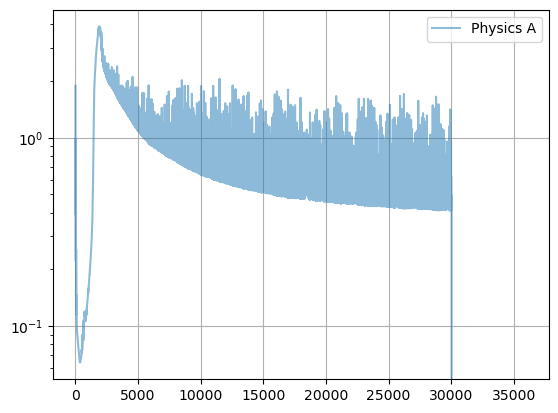

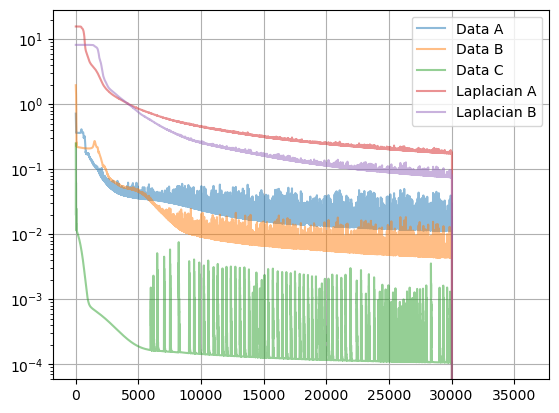

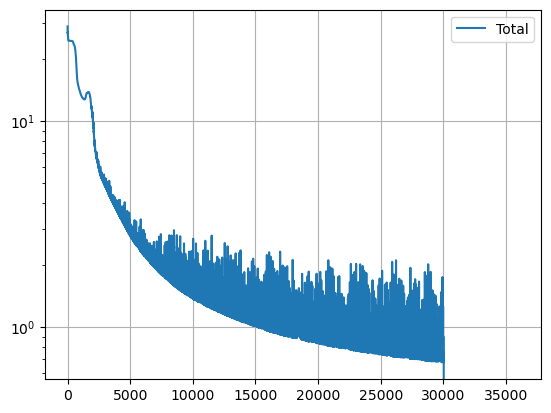

In [8]:
ls= np.sqrt(losses)
plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log');plt.grid();plt.legend();plt.show()

plt.plot(ls[5,:], alpha=.5, label="Physics A")
plt.yscale('log');plt.grid();plt.legend();plt.show()


plt.plot(ls[0,:], alpha=.5, label="Data A")
plt.plot(ls[1,:], alpha=.5, label="Data B")
plt.plot(ls[2,:], alpha=.5, label="Data C")
plt.plot(ls[3,:], alpha=.5, label="Laplacian A")
plt.plot(ls[4,:], alpha=.5, label="Laplacian B")
plt.yscale('log'); plt.grid();plt.legend();plt.show()

plt.plot(np.sum(ls, axis=0), label="Total")
plt.yscale('log'); plt.grid();plt.legend();plt.show()


# Plot the trained Field and its difference

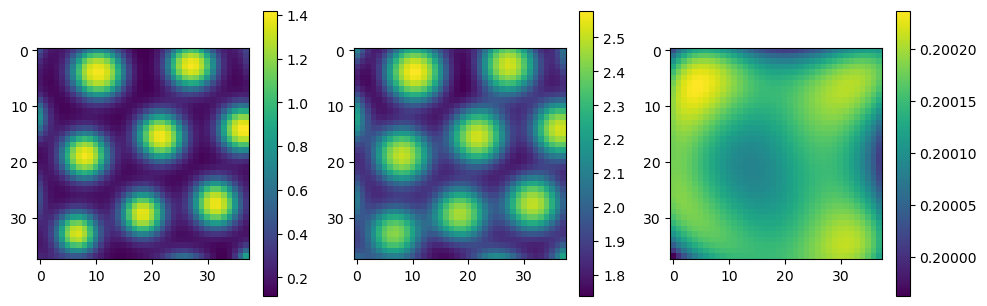

In [9]:
solution_hat = model(data_X)
A_hat = to(solution_hat[0].cpu().detach().numpy())
B_hat = to(solution_hat[1].cpu().detach().numpy())
C_hat = to(solution_hat[2].cpu().detach().numpy())
_ = plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(A_hat)
plt.colorbar(shrink=.5)
plt.subplot(132)
plt.imshow(B_hat)
plt.colorbar(shrink=.5)
plt.subplot(133)
plt.imshow(C_hat)
plt.colorbar(shrink=.5)
plt.tight_layout()
plt.show()

0.011169907006703604
0.004363621488013391
0.00010702906160115966


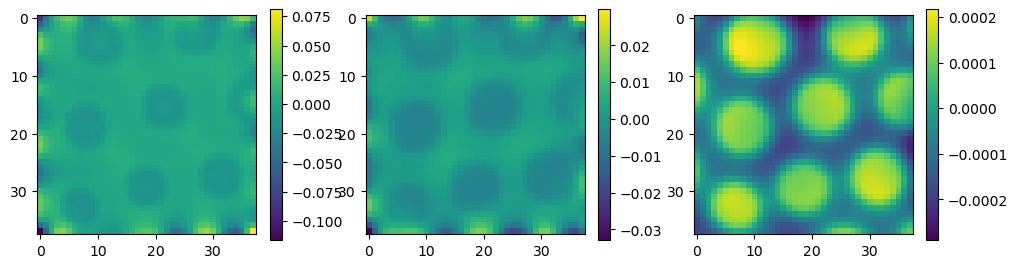

In [10]:
_ = plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(A_hat-A)
print(np.sqrt(np.mean((A_hat-A)**2)))
plt.colorbar(shrink=.75)
plt.subplot(132)
plt.imshow(B_hat-B)
print(np.sqrt(np.mean((B_hat-B)**2)))
plt.colorbar(shrink=.75)
plt.subplot(133)
plt.imshow(C_hat-C)
print(np.sqrt(np.mean((C_hat-C)**2)))
plt.colorbar(shrink=.75)
plt.show()


# Second optimisation
## Find the parameters

In [11]:
estimated_params = dict()
for l, name in zip(params_list, params_name_list):    
    estimated_params[name] = l.item()

In [12]:
Ks_bounds = {"K_AA":K_AA_bound, 
             "K_AB":K_AB_bound, 
             "K_AC":K_AC_bound,
             "K_BA":K_BA_bound, 
             "K_BC":K_BC_bound,
             "K_CB":K_CB_bound, 
             "K_CC": K_CC_bound}
def closest_bound(name, v):
    if not name.startswith("K"):
        return np.nan
    lower, upper = Ks_bounds[name]
    if np.abs(v-lower) < np.abs(v-upper):
        return lower
    else:
        return upper 
def get_bound(name):
    if not name.startswith("K"):
        return (np.nan,np.nan)
    return Ks_bounds[name]
print("name \tOriginl \tEst. \tClosest Bound \tBounds")
print("-------------------------------------------------------------------------------------------------------------")
print("\n".join([ f"{name}:\t{params[name]:.3f}\t\t"                                  
                  f"{estimated_params[name]:.3f}\t\t"
                  f"{closest_bound(name, estimated_params[name]):.3f}\t\t"
                  f"({get_bound(name)[0]:.3f},{get_bound(name)[1]:.3f})"
      for name in params_name_list
]))

name 	Originl 	Est. 	Closest Bound 	Bounds
-------------------------------------------------------------------------------------------------------------
b_A:	0.001		0.000		nan		(nan,nan)
b_B:	1.000		0.000		nan		(nan,nan)
b_C:	1.000		1.001		nan		(nan,nan)
V_A:	50.000		3.003		nan		(nan,nan)
V_B:	25.000		23.966		nan		(nan,nan)
V_C:	10.000		1.000		nan		(nan,nan)
mu_A:	0.500		0.448		nan		(nan,nan)
mu_B:	5.000		4.302		nan		(nan,nan)
K_AA:	1.000		0.919		0.024		(0.024,5.314)
K_AB:	0.500		0.516		0.024		(0.024,5.314)
K_AC:	0.500		2.645		0.024		(0.024,5.314)
K_BA:	1.000		2.160		0.445		(0.445,9.687)
K_BC:	0.500		4.621		0.445		(0.445,9.687)
K_CB:	1.000		0.350		0.053		(0.053,0.753)
K_CC:	0.500		0.350		0.053		(0.053,0.753)


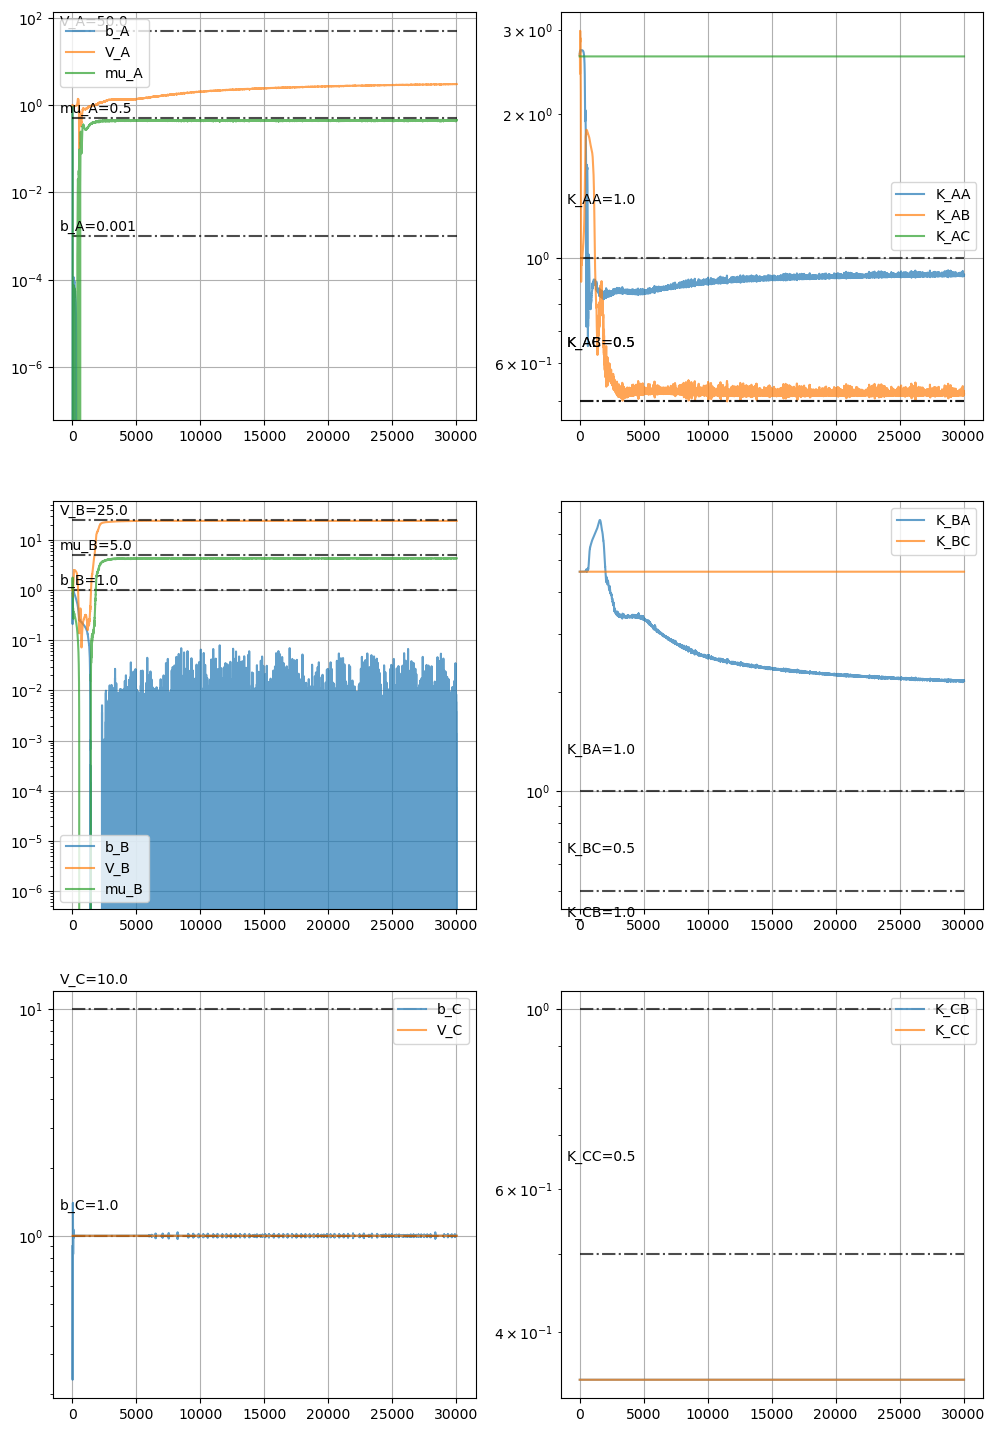

In [13]:
def plot_params(ax, names):    
    for i,(param, name) in enumerate(zip(params_list, params_name_list)):    
        if name not in names:
            continue
        ax.plot(params_sampled_list[i], label=f"{name}", alpha=.7)
        ax.hlines(params[name], 0, len(params_sampled_list[i]), 
                   linestyles='-.', alpha=.7, color='black')
        ax.text(-1000, 1.3*params[name], f"{name}={params[name]}")
    plt.yscale('log');plt.legend();plt.grid()   
    
_ = plt.figure(figsize=(12,18))
plot_params(plt.subplot(321), ["b_A", "mu_A", "V_A"])
plot_params(plt.subplot(322), ["K_AA","K_AB","K_AC"])
plot_params(plt.subplot(323), ["b_B", "mu_B", "V_B"])
plot_params(plt.subplot(324), ["K_BA","K_BC"])
plot_params(plt.subplot(325), ["b_C", "mu_C", "V_C"])
plot_params(plt.subplot(326), ["K_CB","K_CC"])

In [14]:
import pickle

torch.save(model, "./06_outputs/model_PINN_65")
torch.save(model.state_dict(), "./06_outputs/model_PINN_state_65")
with open('./06_outputs/model_PINN_params_name_list_65.npy', 'wb') as f:
    np.save(f, params_name_list)    
with open('./06_outputs/model_PINN_losses_65.npy', 'wb') as f:
    np.save(f, losses)    
with open(f"./06_outputs/model_PINN_estimated_params_65.pkl", "wb") as f:
    pickle.dump((dict(params),  dict(estimated_params)), f)
with open(f"./06_outputs/model_PINN_estimated_params_list_65.pkl", "wb") as f:
    pickle.dump(params_sampled_list, f)     

In [15]:
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/pytorch")

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")

from turing.three_nodes_circuits import create_circuit_3954
from pde_solvers.cn import RD_2D_1st_Order, Neumann_Boundary_2D

D_A, D_B , n, mu_C= 0.01, 1.0, 4, params["mu_C"]
model_integrator = RD_2D_1st_Order(Ds=[D_A, D_B, 0], 
                        delta_t=100/10000, 
                        Lx=10, Ly=10, 
                        Ix=128, Jy=128,
                        boundary_condition=Neumann_Boundary_2D)

/end/home/rh2310/.conda/envs/pytorch/lib/python3.11/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:412: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


In [20]:
def create_kinetics2(n,
                    b_A, mu_A, V_A,
                    K_AA, K_AB, K_AC,
                    b_B, mu_B, V_B,
                    K_BA, K_BC,
                    b_C, mu_C, V_C,
                    K_CB, K_CC):    
    def kinetics(A, B, C):
        F_A =  b_A + V_A*act(A, K_AA, n)*inh(B, K_BA, n) - mu_A * A    
        F_B =  b_B + V_B*act(A, K_AB, n) - mu_B * B        
        F_C =  b_C - mu_C * C 
        return (F_A, F_B, F_C)
    return kinetics

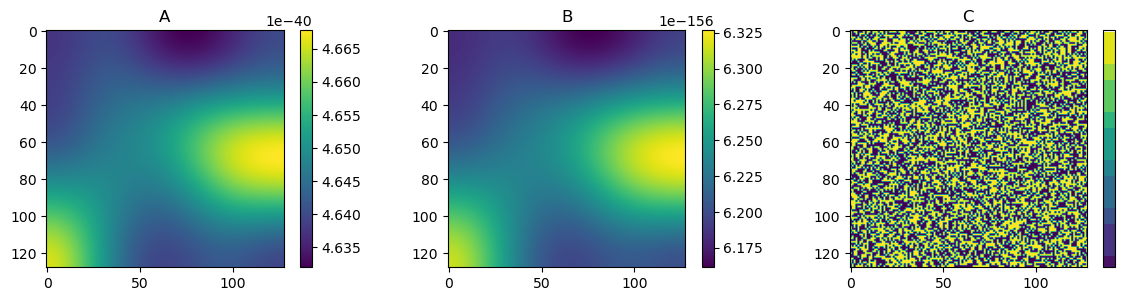

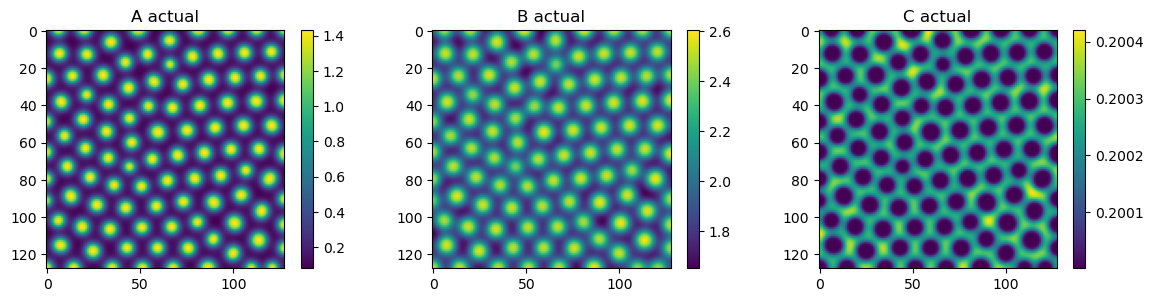

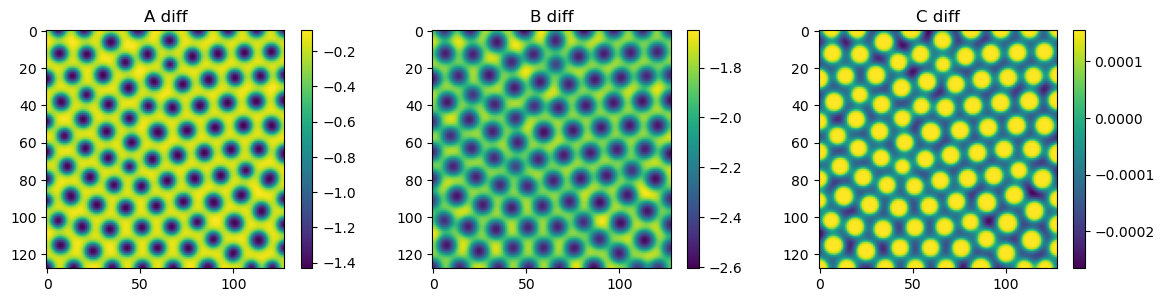

In [21]:

params2 = {}
for k,v in estimated_params.items():
    if not k.startswith("K"):
        params2[k] = v
    else:
        lower, upper = Ks_bounds[k]
        if v < lower:
            params2[k] = lower
        elif v > upper:
            params2[k] = upper
        else:
            params2[k] = v

kinetics = create_kinetics2(n,params2["b_A"], params2["mu_A"], params2["V_A"], 
                           params2["K_AA"], params2["K_AB"], params2["K_AC"],
                           params2["b_B"], params2["mu_B"], params2["V_B"], 
                           params2["K_BA"], params2["K_BC"],
                           params2["b_C"], mu_C, params2["V_C"], 
                           params2["K_CB"], params2["K_CC"])

(A_init, B_init, C_init) = (solution[0, 0, :, :].flatten(),
                            solution[0, 1, :, :].flatten(),
                            solution[0, 2, :, :].flatten())
solution_test = model_integrator.integrate([A_init, B_init, C_init],kinetics, 4*5000, record_steps=5000)

A_test = solution_test[-1,0, :].reshape((128,128))
B_test = solution_test[-1,1, :].reshape((128,128))
C_test = solution_test[-1,2, :].reshape((128,128))
plot_n_im([A_test,B_test,C_test], 
           ["A","B","C"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([solution[105, 0, :, :],solution[105, 1, :, :],solution[105, 2, :, :]], 
           ["A actual","B actual","C actual"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

plot_n_im([A_test-solution[105, 0, :, :],
           B_test-solution[105, 1, :, :],
           C_test-solution[105, 2, :, :]], 
           ["A diff","B diff","C diff"],          
        figsize=(12, 3)); plt.tight_layout();plt.show() 

In [18]:
{1:31,
2:3,
3:9, 
4:25,
5:14,
6:60,
7:24,
8:26,
9:65}

{1: 31, 2: 3, 3: 9, 4: 25, 5: 14, 6: 60, 7: 24, 8: 26, 9: 65}